In [1]:
# Usual
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_samples, silhouette_score

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# for pca
from sklearn.decomposition import PCA

! pip install scikit-plot
import scikitplot as skplt

In [3]:
df = pd.read_csv("/content/OQ - Question Data - Part 1.csv")
df.head(3)

,Quesh,Quesh Date,Total Respo,Avg Rating
0,"If a sandwich was named after you, what would ...",2022-01-10,0,NaN
1,What have you learned about love?,2022-01-09,0,NaN
2,What would you like younger generations to know?,2022-01-08,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Quesh        100 non-null    object 
 1   Quesh Date   100 non-null    object 
 2   Total Respo  100 non-null    int64  
 3   Avg Rating   97 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [5]:
df.dropna(subset = ["Avg Rating"], inplace=True)

In [6]:
df.columns
type(df["Total Respo"])

pandas.core.series.Series

In [7]:
# reset the index
df.index = df.Quesh # reset the index  

# remove the model column 
df.drop(columns='Quesh', inplace=True)
df.drop(columns='Quesh Date', inplace=True)
# make sure the model doesnt exist -- just a numeric dataframe



In [8]:
# standerized 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.shape

(97, 2)

In [9]:
# cluster row 
hc1 = linkage(df_scaled, method='complete')
hc1

array([[6.00000000e+00, 4.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.60000000e+01, 9.70000000e+01, 0.00000000e+00, 3.00000000e+00],
       [4.00000000e+00, 7.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+01, 4.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 5.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.30000000e+01, 2.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.80000000e+01, 7.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.80000000e+01, 7.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.90000000e+01, 4.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [8.70000000e+01, 1.05000000e+02, 0.00000000e+00, 3.00000000e+00],
       [8.50000000e+01, 8.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.40000000e+01, 6.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+01, 6.30000000e+01, 0.00000000e

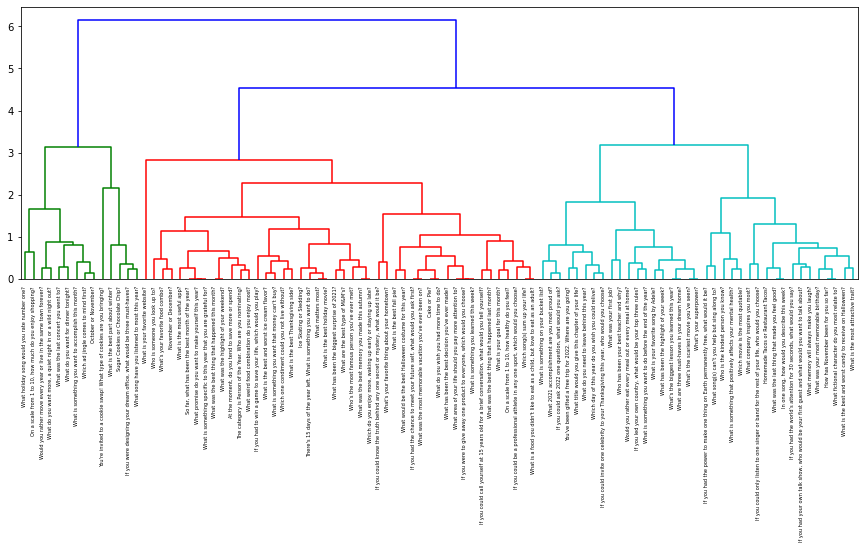

In [10]:
plt.figure(figsize=(15,5))
dendrogram(hc1, labels=df.index)
plt.show()

In [11]:
# extract 3 cluster
df['cluster'] = fcluster(hc1, 3, criterion='maxclust')
df.sample(5)

,Total Respo,Avg Rating,cluster
Quesh,,,
What are the best type of M&M's?,16,3.94,2
"If you were to give away one product to everyone, which would you choose?",12,3.92,2
What is your favorite song by Adele?,13,4.31,3
October or November?,21,3.52,1
"If you led your own country, what would be your top three rules?",13,4.46,3


In [12]:
df.groupby(by='cluster').count()


,Total Respo,Avg Rating
cluster,,
1,14,14
2,46,46
3,37,37


In [13]:
df.groupby(by='cluster').mean()

,Total Respo,Avg Rating
cluster,,
1,22.928571,3.655714
2,14.152174,3.926087
3,12.702703,4.427568
